In [1]:
import pandas as pd
a=pd.read_table("/home/jash/Desktop/petplan/Profitability1.txt", sep='|', lineterminator='\n', error_bad_lines=False)

Skipping line 267909: expected 33 fields, saw 34

Skipping line 299539: expected 33 fields, saw 34

/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
data=pd.DataFrame(data=a,index=None)
data = data.sample(frac=1).reset_index(drop=True)
import math
import numpy as np
data['LossRatio'].fillna(0, inplace=True)
data['L']=0
data.loc[data['LossRatio'] >.57, 'L'] = 1
data.to_csv("/home/jash/Desktop/petplan/Profitabilitynew.csv")
Y=data['L']
y=pd.DataFrame(Y)
x=pd.DataFrame(data)

m=x.loc[x['PolicyForm']!='Introductory']
q=pd.DataFrame(m)
m2=q.loc[q['PolicyForm']!='Intro']
x=pd.DataFrame(m2)
print x['PolicyForm'].unique()

['Unlimited' '15000' '20000' 'Bronze' '10000' 'Gold' 'Silver' '5000'
 '25000' '2500']


In [3]:

x.drop(['LossRatio'],axis=1,inplace=True)
x.drop(['CustomerNumber','PhoneNumber','Surname','GivenName','CustomerMailingAddr_Addr1','CustomerMailingAddr_City','CustomerMailingAddr_StateProvCd',
       'CustomerMailingAddr_PostalCode','PetId','StartDate','EndDate','LastPolicyRef'],axis=1,inplace=True)

p=pd.DataFrame(x)

p['TotalClaimsAmtPaid'].fillna(0, inplace=True)

In [4]:
p.isnull().sum()

Duration                       0
TotalClaimsAmtPaid             0
TotalEarnedPremium             0
BreedName                     24
Currentage                     0
CopayPct                       0
Deductible                     0
PetType                        0
PolicyForm                     0
CarrierCd                      0
ClaimNumber               149283
ClaimAmount               149283
ClaimDetails              149283
ConditionGrp              149283
Claimcodecategory         149283
Severity                  149581
Country                      336
Quadrant                       0
claimdurationInception    149283
churn\r                        0
L                              0
dtype: int64

In [5]:
p.drop(['ClaimNumber','ClaimAmount','Severity','ClaimDetails','ConditionGrp','Claimcodecategory','claimdurationInception'],axis=1,inplace=True)

In [6]:
p.isnull().sum()

Duration                0
TotalClaimsAmtPaid      0
TotalEarnedPremium      0
BreedName              24
Currentage              0
CopayPct                0
Deductible              0
PetType                 0
PolicyForm              0
CarrierCd               0
Country               336
Quadrant                0
churn\r                 0
L                       0
dtype: int64

In [7]:
p.dropna(how='any',inplace=True)

In [8]:
print p.shape

(276915, 14)


In [9]:

import h2o
from h2o.estimators import H2ORandomForestEstimator
h2o.init()
df = h2o.H2OFrame(p)
y = 'L'
x=df.col_names
print df
x.remove(y)
df[y] = df[y].asfactor()
train, valid, test = df.split_frame(ratios=[.8,.1])
from h2o.estimators.gbm import H2OGradientBoostingEstimator
gbm_cv3 = H2OGradientBoostingEstimator(nfolds=3)
gbm_cv3.train(x=x, y=y, training_frame=train)
## Getting all cross validated models 
all_models = gbm_cv3.cross_validation_models()
print("Total cross validation models: " + str(len(all_models)))

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-linux64) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-linux64) (build 25.121-b15, mixed mode)
  Starting server from /home/jash/anaconda3/envs/py27/h2o_jar/h2o.jar
  Ice root: /tmp/tmpJy470k
  JVM stdout: /tmp/tmpJy470k/h2o_jash_started_from_python.out
  JVM stderr: /tmp/tmpJy470k/h2o_jash_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,4 months and 27 days !!!
H2O cluster name:,H2O_from_python_jash_22lox8
H2O cluster total nodes:,1
H2O cluster free memory:,1.714 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/h2o/h2o.py:562: UserWarning: [Lwater.parser.ParseWriter$ParseErr;@7057c4c0
  warnings.warn(w)


Parse progress: |█████████████████████████████████████████████████████████| 100%


/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/h2o/job.py:69: UserWarning: ParseError at file upload_a22cac8a73031c7b95a9809feca6405f at line 0 ( destination line 0 )  at byte offset 164; error = 'Unmatched quote char "'
  warnings.warn(w)
/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/h2o/job.py:69: UserWarning: ParseError at file upload_a22cac8a73031c7b95a9809feca6405f at line 2 ( destination line 2 )  at byte offset 170; error = 'Unmatched quote char "'
  warnings.warn(w)


Duration,TotalClaimsAmtPaid,TotalEarnedPremium,BreedName,Currentage,CopayPct,Deductible,PetType,PolicyForm,CarrierCd,Country,Quadrant,churn,L
nan,nan,nan,BreedName,nan,nan,nan,PetType,nan,CarrierCd,Country,Quadrant,nan,nan
nan,nan,nan,,nan,nan,nan,,nan,,,,nan,nan
1179,63.14,989.372,Cockapoo,4,0.9,200,Dog,nan,XLC,US,HighTenure-LowLR,0,0
1241,574.637,1907.27,Chihuahua long-haired,7,0.9,300,Dog,15000,CAN,CAN,HighTenure-LowLR,0,0
409,0,530.933,Beagle Mix,5,0.9,300,Dog,nan,XLC,US,LowTenure-LowLR,1,0
731,0,1531.59,German Shepherd,6,0.8,500,Dog,20000,XLC,US,HighTenure-LowLR,1,0
601,0,1052.02,Mixed Breed Medium (23 - 70lb),6,0.9,500,Dog,15000,XLC,US,HighTenure-LowLR,0,0
56,0,31.2388,Domestic Mediumhair,0,0.9,250,Cat,15000,XLC,US,LowTenure-LowLR,0,0
365,0,286.29,Golden Retriever,0,0.9,200,Dog,nan,ALZ,US,LowTenure-LowLR,1,0
381,231.2,463.83,German Shepherd,1,0.8,400,Dog,20000,XLC,US,LowTenure-LowLR,1,0



gbm Model Build progress: |███████████████████████████████████████████████| 100%
Total cross validation models: 3


In [10]:
gbm_cv3.confusion_matrix()
performance = gbm_cv3.model_performance(test_data=test)
print performance


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 9.65225288921e-06
RMSE: 0.00310680750759
LogLoss: 0.0030029341425
Mean Per-Class Error: 0.0
AUC: 1.0
Gini: 1.0
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.995922193525: 


,0,1,Error,Rate
0,17671.0,0.0,0.0,(0.0/17671.0)
1,0.0,10060.0,0.0,(0.0/10060.0)
Total,17671.0,10060.0,0.0,(0.0/27731.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.9959222,1.0,0.0
max f2,0.9959222,1.0,0.0
max f0point5,0.9959222,1.0,0.0
max accuracy,0.9959222,1.0,0.0
max precision,0.9959222,1.0,0.0
max recall,0.9959222,1.0,0.0
max specificity,0.9959222,1.0,0.0
max absolute_mcc,0.9959222,1.0,0.0
max min_per_class_accuracy,0.9959222,1.0,0.0
max mean_per_class_accuracy,0.9959222,1.0,0.0


Gains/Lift Table: Avg response rate: 36.28 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.3627709,0.9959222,2.7565606,2.7565606,1.0,1.0,1.0,1.0,175.6560636,175.6560636
,2,1.0,0.0023834,0.0,1.0,0.0,0.3627709,0.0,1.0,-100.0,0.0


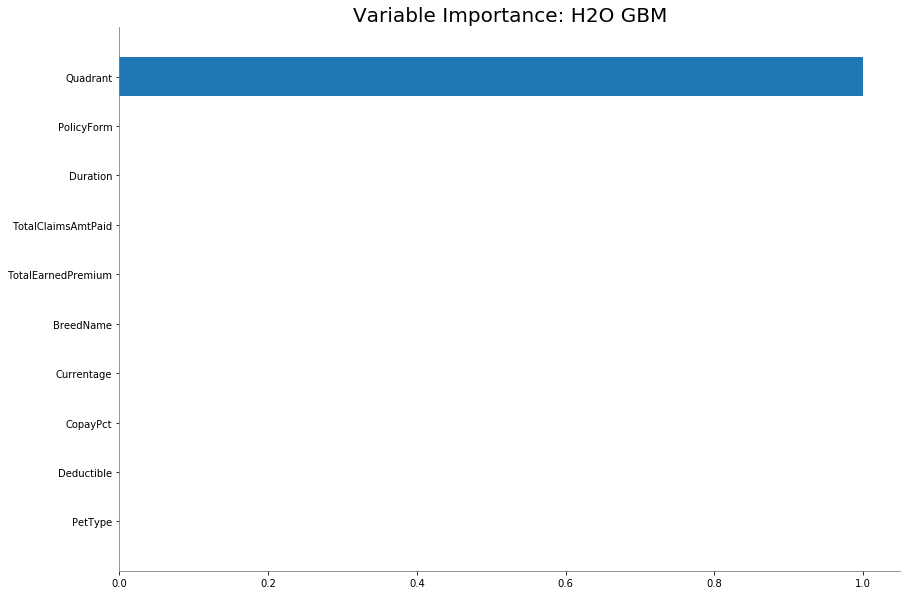

In [12]:
import matplotlib.pyplot as plt
gbm_cv3.varimp_plot()